# Titanic Dataset Analysis

# --- 1. Introduction ---
# In this notebook, we perform Exploratory Data Analysis (EDA) on the Titanic dataset.
# Goals:
# - Clean and preprocess the data
# - Generate summary statistics and insights
# - Visualize key patterns and correlations to understand survival rates


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# --- 2. Load Dataset ---
import kagglehub
import os
path = kagglehub.dataset_download("yasserh/titanic-dataset")
df = pd.read_csv(os.path.join(path, 'Titanic-Dataset.csv'))

In [4]:
# Preview dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# --- 3. Data Cleaning ---
# Check missing values
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# Fill missing values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

In [7]:
# Drop irrelevant columns
df.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)

In [8]:
# Confirm no missing values
df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [9]:
# --- 4. Basic Stats ---
print("Total passengers:", df.shape[0])
print("Number of survivors:", df['Survived'].sum())
print("Number of deaths:", df['Survived'].count() - df['Survived'].sum())

Total passengers: 891
Number of survivors: 342
Number of deaths: 549


In [10]:
# --- 5. Feature Engineering for Readability ---
df['Survived'] = df['Survived'].replace({1: 'Survived', 0: 'Died'})
df['Pclass'] = df['Pclass'].replace({1: 'First', 2: 'Second', 3: 'Third'})
df['Embarked'] = df['Embarked'].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

#Visualization

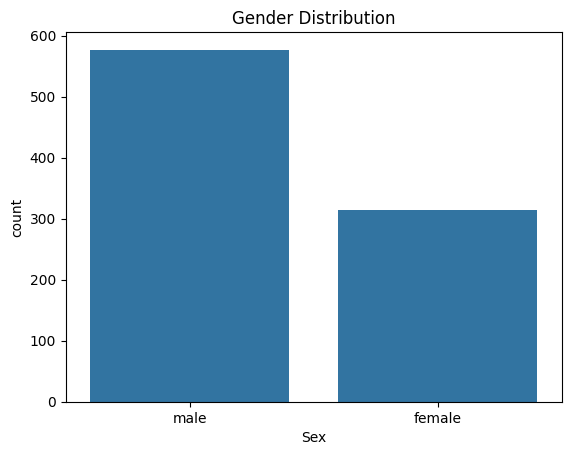

In [11]:
# Gender distribution
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

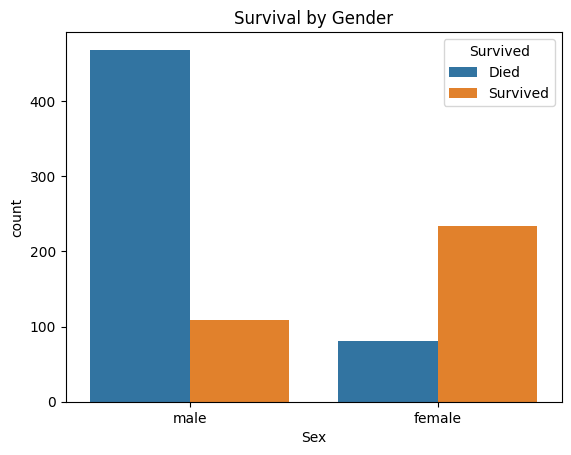

In [12]:
# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

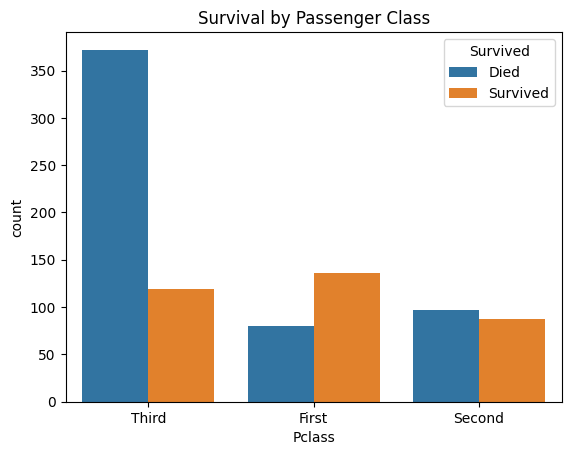

In [13]:
# Survival by Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

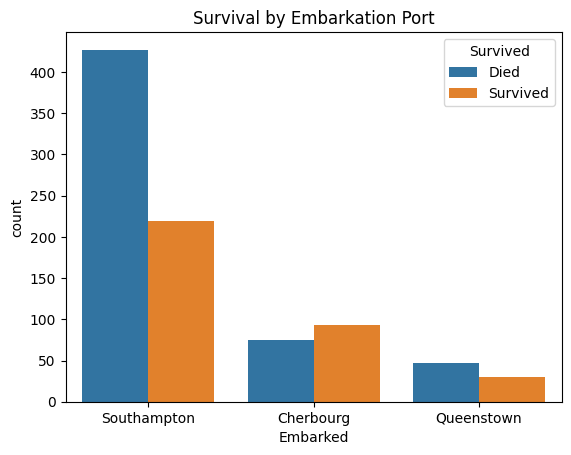

In [15]:
# Survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Port')
plt.show()

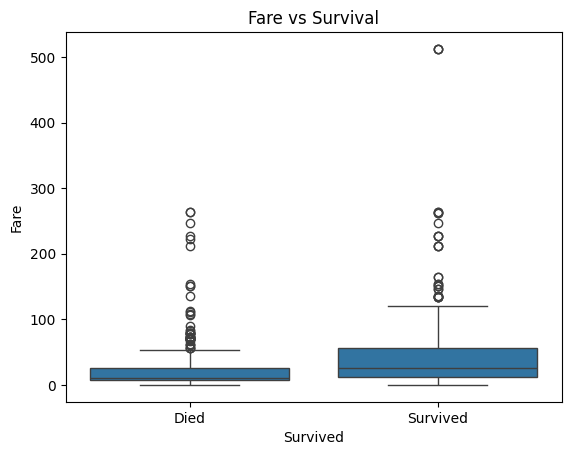

In [16]:
# Boxplot Fare
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()

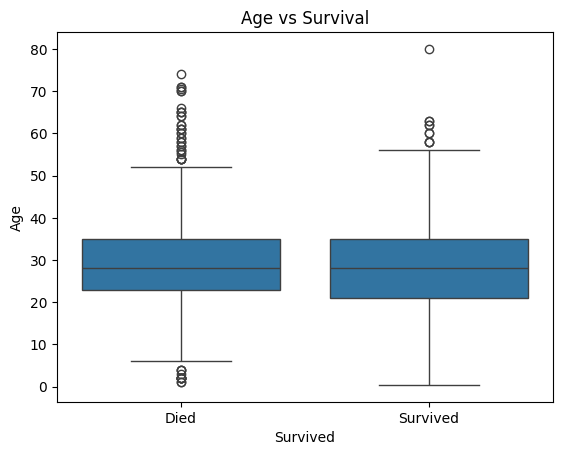

In [17]:
# Boxplot Age
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

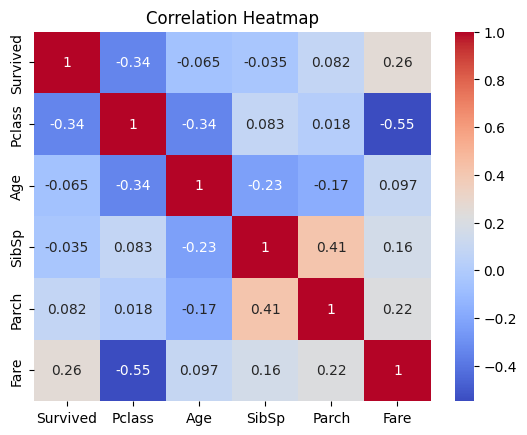

In [22]:
# Correlation Heatmap (numerical features only)
numeric_df = df.copy()
numeric_df['Survived'] = numeric_df['Survived'].replace({'Survived': 1, 'Died': 0})
numeric_df['Pclass'] = numeric_df['Pclass'].replace({'First': 1, 'Second': 2, 'Third': 3})
numeric_df = numeric_df.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

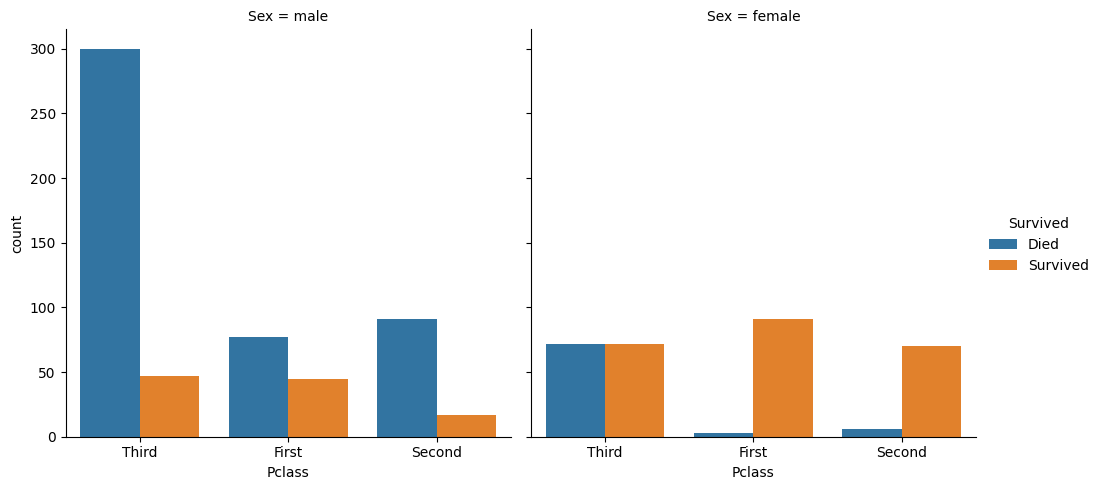

In [23]:
# Survival by Gender and Class Combined
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=df)
plt.show()

# --- 7. Insights & Conclusions ---
# - Women had significantly higher survival rates than men.
# - First-class passengers had the highest survival probability.
# - Passengers from Cherbourg had better chances compared to other ports.
# - Fare and Age show some relation with survival; younger and higher-paying passengers survived more.